# Task 1

258


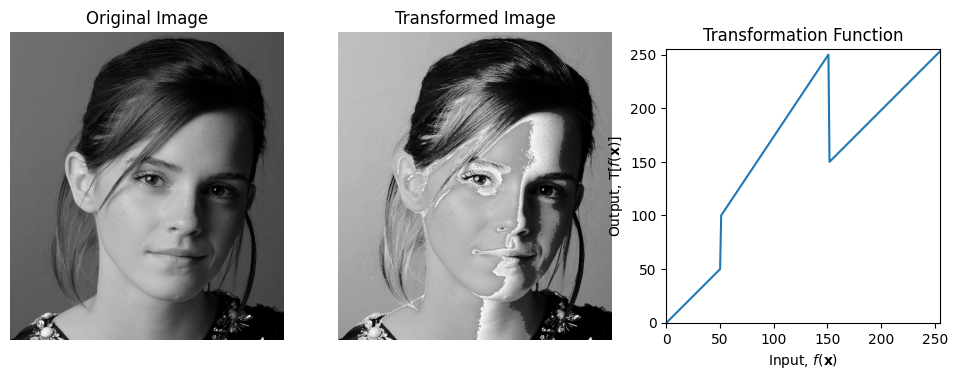

In [6]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 50, 51)
y1 = x1

x2 = np.array([50, 50])
y2 = np.array([50, 100])

x3 = np.linspace(50, 150, 101)
y3 = np.linspace(100, 250, 101)

x4 = np.array([150, 150])
y4 = np.array([250, 150])

x5 = np.linspace(150, 255, 106)
y5 = np.linspace(150, 255, 106)

# Combine the segments
x = np.concatenate((x1, x2[1:], x3[1:], x4[1:], x5[1:]))
y = np.concatenate((y1, y2[1:], y3[1:], y4[1:], y5[1:]))
print(len(y))

f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y[f], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(y,)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal') 
plt.show()

# Task 2

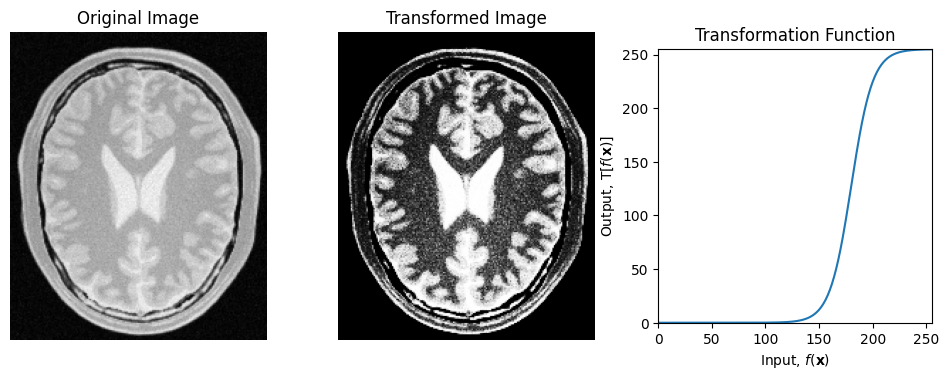

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def white_matter_curve(x):
    #sigmoid function to map the intensity values for white matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(-aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)

y_white = white_matter_curve(f)

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y_white[img], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].plot(y_white)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
for a in ax[0:2]:
    a.axis('off')
plt.show()

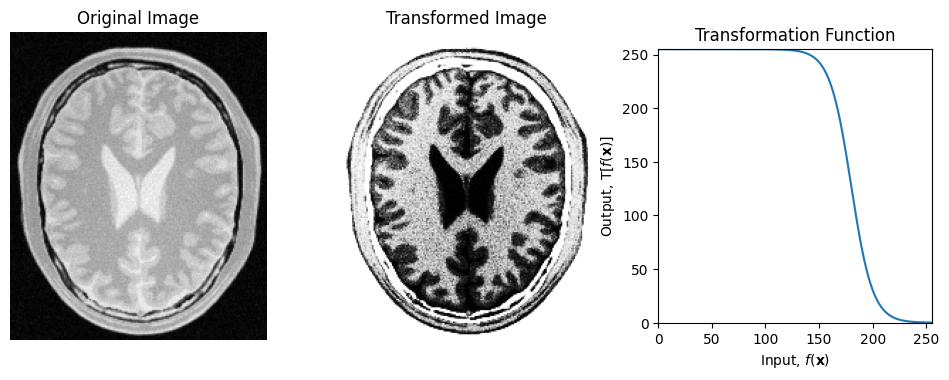

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def white_matter_curve(x):
    #inverse sigmoid function to map the intensity values for dark matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)

y_white = white_matter_curve(f)

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y_white[img], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].plot(y_white)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
for a in ax[0:2]:
    a.axis('off')
plt.show()

# Task 3

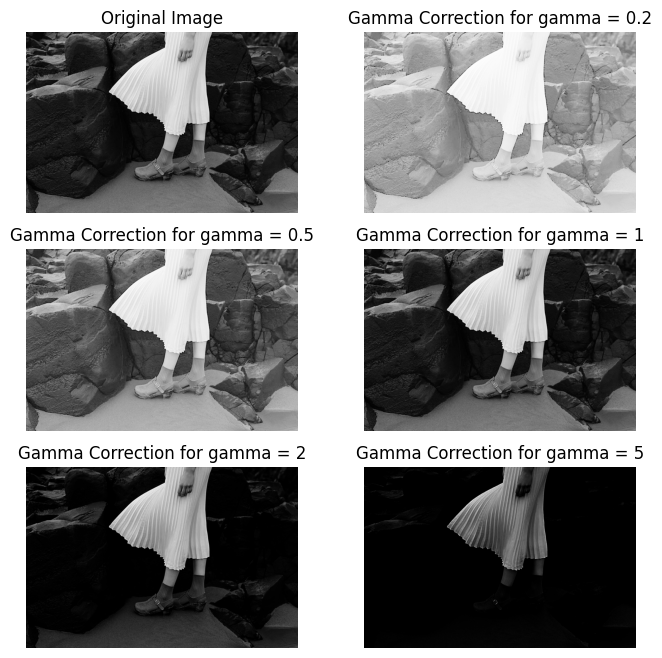

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\highlights_and_shadows.jpg', cv.IMREAD_GRAYSCALE)

#Apply Linear gamma correction

gamma_1 = 0.2
gamma_2 = 0.5
gamma_3 = 1.0
gamma_4 = 2.0
gamma_5 = 5.0

t1 = np.array([((i/255.0)**gamma_1)*255 for i in np.arange(0,256)]).astype('uint8')
t2 = np.array([((i/255.0)**gamma_2)*255 for i in np.arange(0,256)]).astype('uint8')
t3 = np.array([((i/255.0)**gamma_3)*255 for i in np.arange(0,256)]).astype('uint8')
t4 = np.array([((i/255.0)**gamma_4)*255 for i in np.arange(0,256)]).astype('uint8')
t5 = np.array([((i/255.0)**gamma_5)*255 for i in np.arange(0,256)]).astype('uint8')

g1 = cv.LUT(img, t1)
g2 = cv.LUT(img, t2)
g3 = cv.LUT(img, t3)
g4 = cv.LUT(img, t4)
g5 = cv.LUT(img, t5)

fig, ax = plt.subplots(3, 2, figsize=(8, 8))
ax[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(g1, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Gamma Correction for gamma = 0.2')
ax[1, 0].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Gamma Correction for gamma = 0.5')
ax[1, 1].imshow(g3, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Gamma Correction for gamma = 1')
ax[2, 0].imshow(g4, cmap='gray', vmin=0, vmax=255)
ax[2, 0].set_title('Gamma Correction for gamma = 2')
ax[2, 1].imshow(g5, cmap='gray', vmin=0, vmax=255)
ax[2, 1].set_title('Gamma Correction for gamma = 5')
for row in ax:
    for a in row:
        a.axis('off')
plt.show()

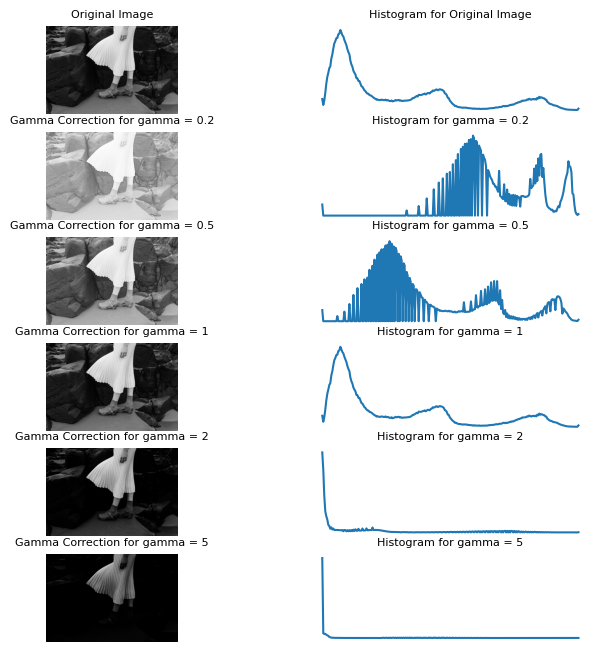

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\highlights_and_shadows.jpg', cv.IMREAD_GRAYSCALE)

#Apply Linear gamma correction

gamma_1 = 0.2
gamma_2 = 0.5
gamma_3 = 1.0
gamma_4 = 2.0
gamma_5 = 5.0

t1 = np.array([((i/255.0)**gamma_1)*255 for i in np.arange(0,256)]).astype('uint8')
t2 = np.array([((i/255.0)**gamma_2)*255 for i in np.arange(0,256)]).astype('uint8')
t3 = np.array([((i/255.0)**gamma_3)*255 for i in np.arange(0,256)]).astype('uint8')
t4 = np.array([((i/255.0)**gamma_4)*255 for i in np.arange(0,256)]).astype('uint8')
t5 = np.array([((i/255.0)**gamma_5)*255 for i in np.arange(0,256)]).astype('uint8')

g1 = cv.LUT(img, t1)
g2 = cv.LUT(img, t2)
g3 = cv.LUT(img, t3)
g4 = cv.LUT(img, t4)
g5 = cv.LUT(img, t5)

hist = cv.calcHist([img], [0], None, [256], [0, 256])
hist1 = cv.calcHist([g1], [0], None, [256], [0, 256])
hist2 = cv.calcHist([g2], [0], None, [256], [0, 256])
hist3 = cv.calcHist([g3], [0], None, [256], [0, 256])
hist4 = cv.calcHist([g4], [0], None, [256], [0, 256])
hist5 = cv.calcHist([g5], [0], None, [256], [0, 256])

fig, ax = plt.subplots(6, 2, figsize=(8, 8))
ax[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image', fontsize=8)
ax[0, 1].plot(hist)
ax[0, 1].set_title('Histogram for Original Image', fontsize=8)
ax[1, 0].imshow(g1, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Gamma Correction for gamma = 0.2', fontsize=8)
ax[1, 1].plot(hist1)
ax[1, 1].set_title('Histogram for gamma = 0.2', fontsize=8)
ax[2, 0].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[2, 0].set_title('Gamma Correction for gamma = 0.5', fontsize=8)
ax[2, 1].plot(hist2)
ax[2, 1].set_title('Histogram for gamma = 0.5', fontsize=8)
ax[3, 0].imshow(g3, cmap='gray', vmin=0, vmax=255)
ax[3, 0].set_title('Gamma Correction for gamma = 1', fontsize=8)
ax[3, 1].plot(hist3)
ax[3, 1].set_title('Histogram for gamma = 1', fontsize=8)
ax[4, 0].imshow(g4, cmap='gray', vmin=0, vmax=255)
ax[4, 0].set_title('Gamma Correction for gamma = 2', fontsize=8)
ax[4, 1].plot(hist4)
ax[4, 1].set_title('Histogram for gamma = 2', fontsize=8)
ax[5, 0].imshow(g5, cmap='gray', vmin=0, vmax=255)
ax[5, 0].set_title('Gamma Correction for gamma = 5', fontsize=8)
ax[5, 1].plot(hist5)
ax[5, 1].set_title('Histogram for gamma = 5', fontsize=8)
for row in ax:
    for a in row:
        a.axis('off')
plt.show()

# Task 4

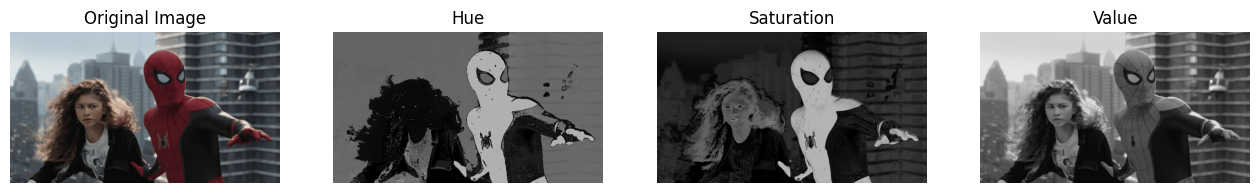

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\spider.png')
assert img is not None

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()





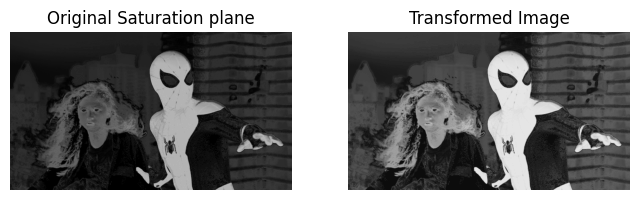

In [61]:
#Intensity transformation function

def IntensityTransformation(x):
    alpha = 0.5
    sigma = 70
    curve = x + alpha*128*(np.exp(-((x-128)**2)/(2*sigma**2)))
    return np.minimum(curve, 255)

#Get the curve
f = np.linspace(0,255,256)
y = IntensityTransformation(f)

#Apply the transformation function to the image
transformed_img = y[img_saturation]

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Saturation plane')
ax[1].imshow(transformed_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

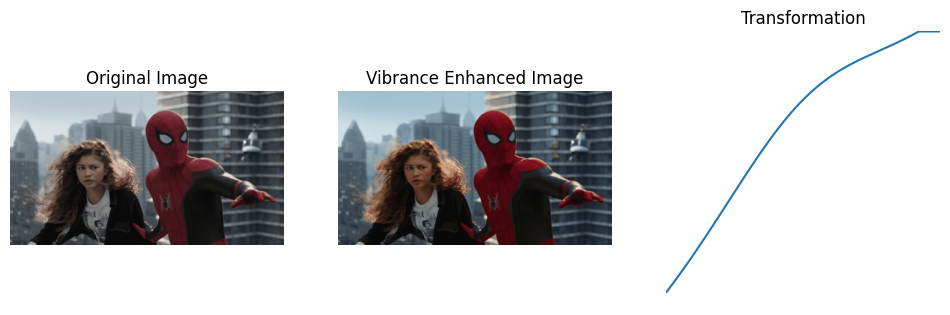

In [59]:
# Ensure all channels have the same dimensions and data types
assert img_hue.shape == transformed_img.shape == img_value.shape, "Channel dimensions do not match"
transformed_img = transformed_img.astype(img_hue.dtype)  # Ensure data types match
assert img_hue.dtype == transformed_img.dtype == img_value.dtype, "Channel data types do not match"

#Recombine the image
hsv_merged = cv.merge([img_hue, transformed_img, img_value])
assert hsv_merged is not None
#Convert the image back to RGB
img_converted_rgb = cv.cvtColor(hsv_merged, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_converted_rgb, cmap='hsv', vmin=0, vmax=255)
ax[1].set_title('Vibrance Enhanced Image')
ax[2].plot(y)
ax[2].set_title('Transformation')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
for a in ax:
    a.axis('off')

plt.show()

# Task 5

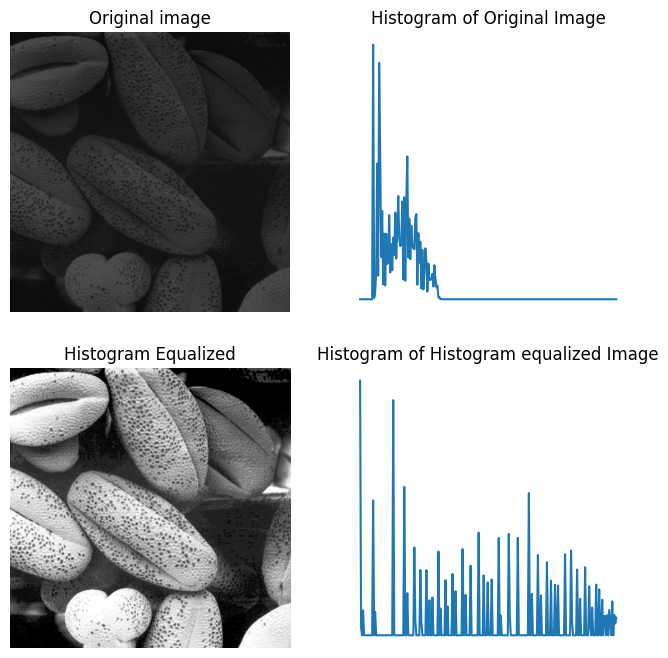

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images/shells.tif',cv.IMREAD_GRAYSCALE)

#Function to equalize the histogram of an image
def histogramEqualized(path):
    import cv2 as cv
    import numpy as np
    import matplotlib.pyplot as plt

    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None
    hist_equalized = cv.equalizeHist(img)

    return hist_equalized

g = histogramEqualized('a1images/shells.tif')
#Histogram calculation
hist1 = cv.calcHist([img],[0], None, [256], [0, 256])
hist2 = cv.calcHist([g],[0], None, [256], [0, 256])

#plot the images
fig, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].imshow(img, cmap ='gray', vmin=0,vmax=255)
ax[0,0].set_title('Original image')
ax[0,1].plot(hist1)
ax[0,1].set_title('Histogram of Original Image')
ax[1,0].imshow(g, cmap = 'gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Equalized')
ax[1,1].plot(hist2)
ax[1,1].set_title('Histogram of Histogram equalized Image')
for row in ax:
    for a in row:
        a.axis('off')

plt.show()

# Task 6

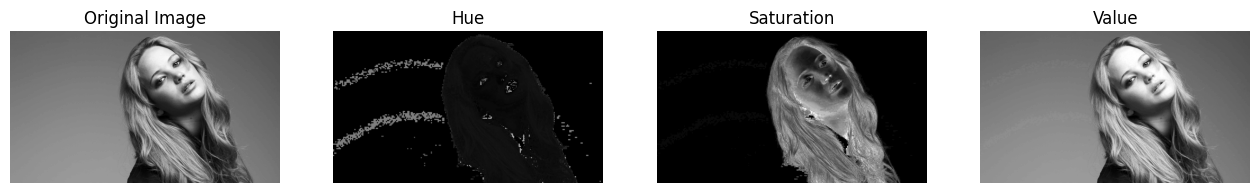

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images/jeniffer.jpg')
assert img is not None

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

#plot the images
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_gray, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()


Text(0.5, 1.0, 'Histogram')

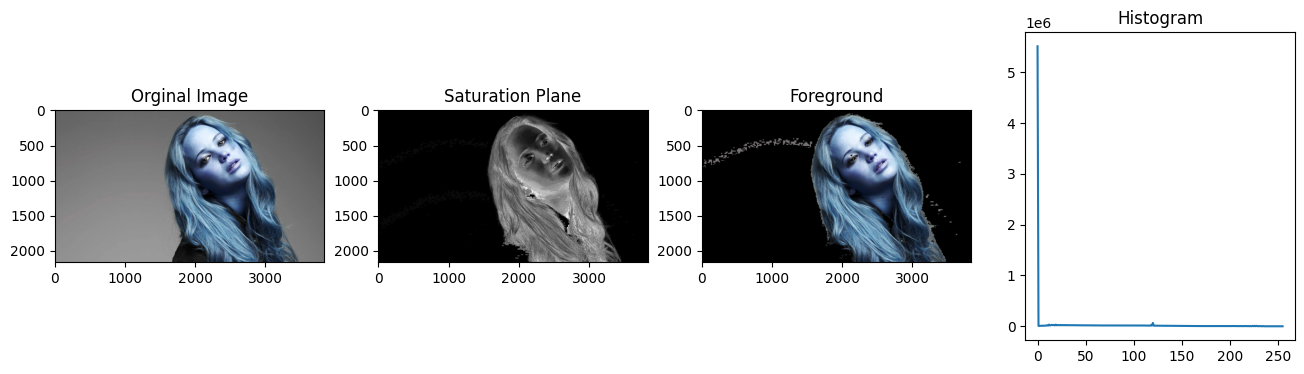

In [72]:
#Choose the saturation plane for applying the threshold mask
rows,cols,channels = img.shape
#roi = img[0:rows, 0:cols]
ret, mask = cv.threshold(img_saturation, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
img_fg = cv.bitwise_and(img, img, mask=mask)
img_bg = cv.bitwise_and(img,img,mask=mask_inv)

hist = cv.calcHist([img_fg], [0], None, [256], [0, 256] )

fig, ax = plt.subplots(1,4,figsize=(16,4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Orginal Image')
ax[1].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation Plane')
ax[2].imshow(img_fg, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Foreground')
ax[3].plot(hist)
ax[3].set_title('Histogram')

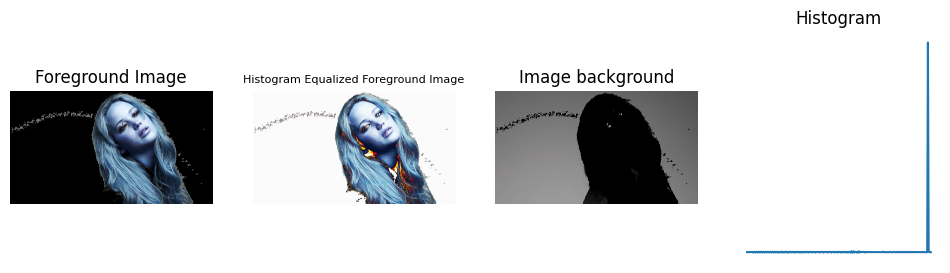

In [73]:
#g = cv.equalizeHist(img_fg)
# hist = cv.calcHist([img_fg], [0], None, [256], [0, 256])
# cdf = hist.cumsum()

#Histogram Equalization
M, N, _ = img_fg.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(img_fg.ravel(), 256, [0, 256])
cdf = hist.cumsum()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[img_fg]

hist_g, bins_g = np.histogram(g.ravel(), 256, [0, 256])

# g = cv.equalizeHist(img_fg)
# hist_g = cv.calcHist([g], [0], None, [0, 256])

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].imshow(img_fg, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Foreground Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalized Foreground Image', fontsize=8)
ax[2].imshow(img_bg, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Image background')
ax[3].plot(hist_g)
ax[3].set_title('Histogram')

for a in ax:
    a.axis('off')

plt.show()

(-0.5, 3839.5, 2159.5, -0.5)

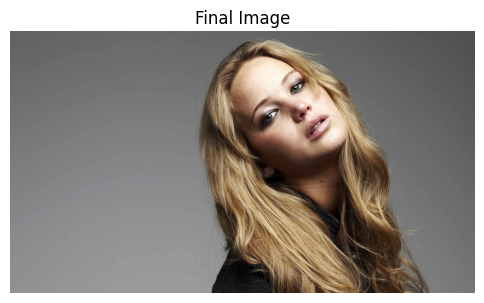

In [74]:
dst = cv.add(img_bg, img_fg)
img[0:rows, 0:cols] = dst

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(img, cmap='gray', vmin=0, vmax=255)
ax.set_title('Final Image')
ax.axis('off')

# Task 7

#